<a href="https://colab.research.google.com/github/nicolaineo/fork_demo/blob/main/DAO_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contents
- [Data Overview](#section1)
- [Cleaning Data](#section2)
    - [Standardising Column Values and Type ](#section2.1)
    - [Checking for Nan Values](#section2.2)
    - [Checking for Duplicates](#section2.3)
    - [Checking for Outliers](#section2.4)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Overview <a id="section1"></a>

In [2]:
df = pd.read_csv('ecommerce.csv')
df.info()

NameError: ignored

In [ ]:
df.dtypes

Order ID             object
Order Date           object
Ship Date            object
Aging               float64
Ship Mode            object
Product Category     object
Product              object
Sales                object
Quantity             object
Discount             object
Profit               object
Shipping Cost        object
Order Priority       object
Customer ID          object
Customer Name        object
Segment              object
City                 object
State                object
Country              object
Region               object
Months               object
dtype: object

# Cleaning Data <a id="section2"></a>

### Standardising Column Values and Type <a id="section2.1"></a>

In [ ]:
## Data Cleaning for Sales ## 
df['Sales'] = df['Sales'].str.replace('$',"")
df=df[df.Sales != ("0.xf")]
df=df[df.Sales != ('0.5.26') ]
df['Sales'] = df['Sales'].astype(float)

<ipython-input-13-f1614a391eea>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Sales'] = df['Sales'].str.replace('$',"")


In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
0,AU-2015-1,11/9/15,11/17/15,8.0,First Class,Auto & Accessories,Car Media Players,140.0,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
1,AU-2015-2,6/30/15,7/2/15,2.0,First Class,Auto & Accessories,Car Speakers,211.0,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
2,AU-2015-3,12/5/15,12/13/15,8.0,First Class,Auto & Accessories,Car Body Covers,117.0,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
3,AU-2015-4,5/9/15,5/16/15,7.0,First Class,Auto & Accessories,Car & Bike Care,118.0,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
4,AU-2015-5,7/9/15,7/18/15,9.0,First Class,Auto & Accessories,Tyre,250.0,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


In [ ]:
## Data Cleaning for Discount ## 
df['Discount'].value_counts()
df['Discount'] = df['Discount'].str.replace('xxx',"0")
df['Discount'] = df['Discount'].astype(float)

In [ ]:
df['Discount']

0        0.05
1        0.03
2        0.01
3        0.05
4        0.04
         ... 
51285     NaN
51286     NaN
51287     NaN
51288     NaN
51289     NaN
Name: Discount, Length: 51289, dtype: float64

In [ ]:
## Data Cleaning for Shipping Cost ## 
df['Shipping Cost'] = df['Shipping Cost'].str.replace('$',"")
df['Shipping Cost'].value_counts()
df=df[df ['Shipping Cost']!= ('test') ] 
df['Shipping Cost'] = df['Shipping Cost'].astype(float)

<ipython-input-17-03186e379b72>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Shipping Cost'] = df['Shipping Cost'].str.replace('$',"")
<ipython-input-17-03186e379b72>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Shipping Cost'] = df['Shipping Cost'].astype(float)


In [ ]:
df.dtypes

Order ID             object
Order Date           object
Ship Date            object
Aging               float64
Ship Mode            object
Product Category     object
Product              object
Sales               float64
Quantity             object
Discount            float64
Profit               object
Shipping Cost       float64
Order Priority       object
Customer ID          object
Customer Name        object
Segment              object
City                 object
State                object
Country              object
Region               object
Months               object
dtype: object

In [ ]:
## Data Cleaning for Profit ## 
df['Profit'] = df['Profit'].str.replace('$',"")
df['Profit'] = df['Profit'].astype(float)

<ipython-input-19-4e01d005e1d7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Profit'] = df['Profit'].str.replace('$',"")
<ipython-input-19-4e01d005e1d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Profit'] = df['Profit'].str.replace('$',"")
<ipython-input-19-4e01d005e1d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Profit'] = 

In [ ]:
## Data Cleaning for Quantity ## 
df['Quantity'].unique()

array(['2', '3', '5', '1', '4', nan, 'abc', 4, 5, 2, 3, 1], dtype=object)

In [ ]:
# Removing invalid data values
df=df[df['Quantity'] != ("abc")]
df['Quantity'].unique()

array(['2', '3', '5', '1', '4', nan, 4, 5, 2, 3, 1], dtype=object)

In [ ]:
df['Quantity'] = df['Quantity'].astype(float)
df.dtypes

<ipython-input-22-708696aa26a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity'] = df['Quantity'].astype(float)


Order ID             object
Order Date           object
Ship Date            object
Aging               float64
Ship Mode            object
Product Category     object
Product              object
Sales               float64
Quantity            float64
Discount            float64
Profit              float64
Shipping Cost       float64
Order Priority       object
Customer ID          object
Customer Name        object
Segment              object
City                 object
State                object
Country              object
Region               object
Months               object
dtype: object

In [ ]:
df['Quantity'].unique()

array([ 2.,  3.,  5.,  1.,  4., nan])

In [ ]:
## Data Cleaning for Order Date ## 
df['Order Date']

0        11/9/15
1        6/30/15
2        12/5/15
3         5/9/15
4         7/9/15
          ...   
51285    1/21/15
51286    6/22/15
51287     1/1/15
51288    12/7/15
51289    12/1/15
Name: Order Date, Length: 51287, dtype: object

In [ ]:
# Convert to datetime type
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Date']

<ipython-input-25-3efc3ce11ddd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])


0       2015-11-09
1       2015-06-30
2       2015-12-05
3       2015-05-09
4       2015-07-09
           ...    
51285   2015-01-21
51286   2015-06-22
51287   2015-01-01
51288   2015-12-07
51289   2015-12-01
Name: Order Date, Length: 51287, dtype: datetime64[ns]

In [ ]:
## Data Cleaning for Ship Date ## 
# Convert to datetime type
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [ ]:
df.dtypes

Order ID                    object
Order Date          datetime64[ns]
Ship Date           datetime64[ns]
Aging                      float64
Ship Mode                   object
Product Category            object
Product                     object
Sales                      float64
Quantity                   float64
Discount                   float64
Profit                     float64
Shipping Cost              float64
Order Priority              object
Customer ID                 object
Customer Name               object
Segment                     object
City                        object
State                       object
Country                     object
Region                      object
Months                      object
dtype: object

In [ ]:
## Data Cleaning for Ship Mode ## 
df = df[df['Ship Mode'] != '45788']
df['Ship Mode'].value_counts()

Standard Class    30775
Second Class      10309
First Class        7501
Same Day           2701
Name: Ship Mode, dtype: int64

In [ ]:
## Data Cleaning for Region ##
df['Region'].value_counts()

Central           11117
South              6643
EMEA               5029
North              4784
Africa             4586
Oceania            3487
West               3203
Southeast Asia     3128
East               2848
North Asia         2336
Central Asia       2048
Caribbean          1690
Canada              384
So3th                 1
4orth                 1
Name: Region, dtype: int64

In [ ]:
df['Region'] = df['Region'].str.replace('So3th',"South")
df['Region'] = df['Region'].str.replace('4orth',"North")
df['Region'].value_counts()

Central           11117
South              6644
EMEA               5029
North              4785
Africa             4586
Oceania            3487
West               3203
Southeast Asia     3128
East               2848
North Asia         2336
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

### Checking for NaN values <a id="section2.2"></a>
Removing all the rows containing missing and unknown data

In [ ]:
df.isnull().sum()

Order ID                0
Order Date              1
Ship Date               0
Aging                   1
Ship Mode               0
Product Category        0
Product                 0
Sales                   0
Quantity                1
Discount            18522
Profit                  0
Shipping Cost           0
Order Priority          2
Customer ID             1
Customer Name           0
Segment                 1
City                    0
State                   0
Country                 0
Region                  1
Months                  0
dtype: int64

For the `Discount` column, we make an assumption that the values that contain missing values or unknown data are ones that have zero discount

In [ ]:
df['Discount'] = df['Discount'].fillna(0)
df.isnull().sum()

Order ID            0
Order Date          1
Ship Date           0
Aging               1
Ship Mode           0
Product Category    0
Product             0
Sales               0
Quantity            1
Discount            0
Profit              0
Shipping Cost       0
Order Priority      2
Customer ID         1
Customer Name       0
Segment             1
City                0
State               0
Country             0
Region              1
Months              0
dtype: int64

For the other columns, we remove the missing/unknown data to increase our accuracy  

In [ ]:
df = df.dropna()
df.isnull().sum()

Order ID            0
Order Date          0
Ship Date           0
Aging               0
Ship Mode           0
Product Category    0
Product             0
Sales               0
Quantity            0
Discount            0
Profit              0
Shipping Cost       0
Order Priority      0
Customer ID         0
Customer Name       0
Segment             0
City                0
State               0
Country             0
Region              0
Months              0
dtype: int64

In [ ]:
df.shape

(51278, 21)

### Checking for Duplicates <a id="section2.3"></a>

In [ ]:
print(df[df.duplicated() == True])

Empty DataFrame
Columns: [Order ID, Order Date, Ship Date, Aging, Ship Mode, Product Category, Product, Sales, Quantity, Discount, Profit, Shipping Cost, Order Priority, Customer ID, Customer Name, Segment, City, State, Country, Region, Months]
Index: []

[0 rows x 21 columns]


Shows that there are no duplicates in the dataframe

### Checking for Outliers <a id="section2.4"></a>

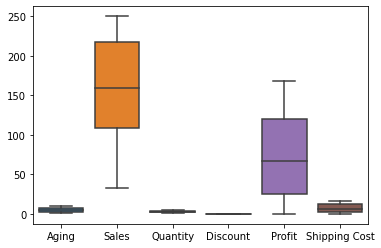

In [ ]:
sns.boxplot(data=df)
plt.show()

Text(0, 0.5, 'count')

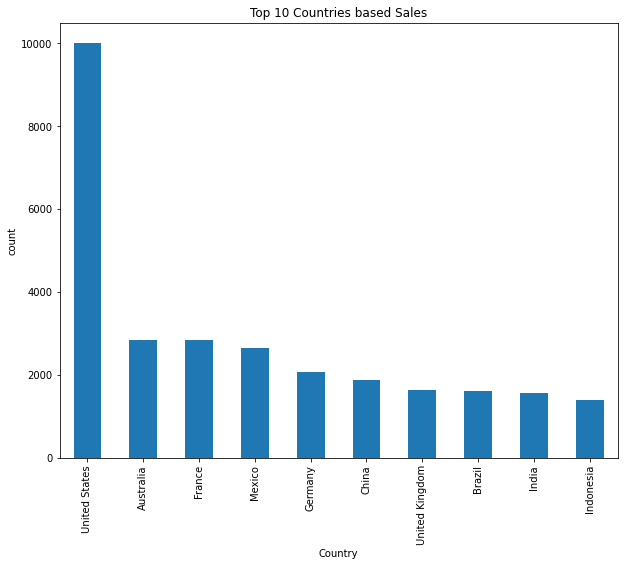

In [ ]:
top_10 = df['Country'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
plt.title('Top 10 Countries based Sales') 
plt.xlabel("Country")
plt.ylabel("count")

<h2>Finding out which product category is more popular in certain months</h2>

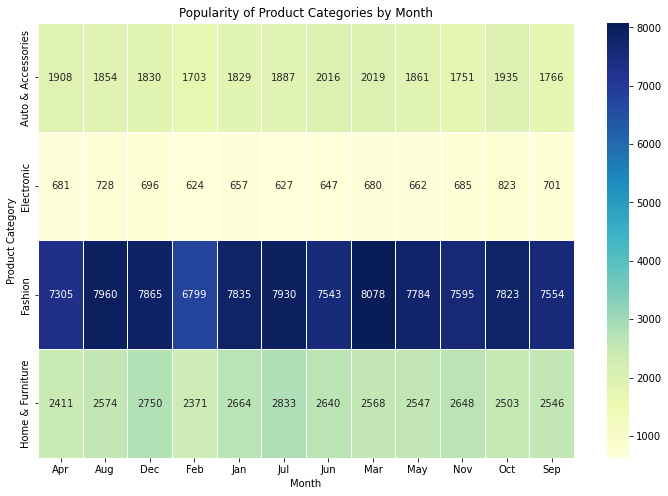

In [ ]:
popular_products = df.groupby(['Product Category', 'Months'])['Quantity'].sum().reset_index()

popular_products = popular_products.pivot(index='Product Category', columns='Months', values='Quantity')

plt.figure(figsize=(12, 8))
sns.heatmap(popular_products, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=.5)
plt.title('Popularity of Product Categories by Month')
plt.xlabel('Month')
plt.ylabel('Product Category')
plt.show()

<h3>Using country as observation for profit</h3>

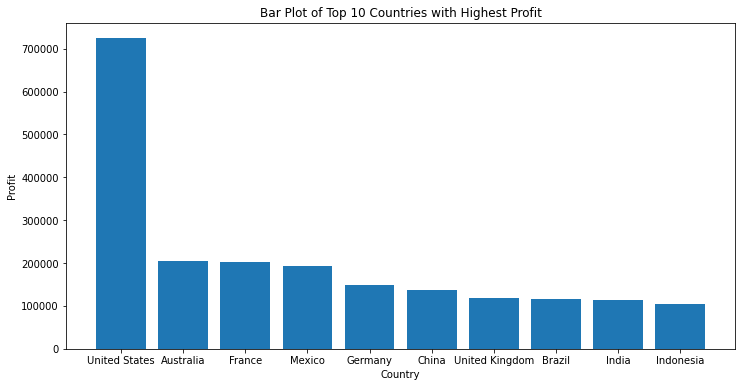

In [ ]:
profit_by_country = df.groupby("Country")["Profit"].sum().reset_index()
profit_by_country_sorted = profit_by_country.sort_values("Profit", ascending=False)
top_10_countries = profit_by_country_sorted.head(10)
fig = plt.figure(figsize=(12,6))
plt.bar(top_10_countries["Country"], top_10_countries["Profit"])
plt.title("Bar Plot of Top 10 Countries with Highest Profit")
plt.ylabel("Profit")
plt.xlabel("Country")
plt.show()

<h3>Using state as observation for profit</h3>

ALL States

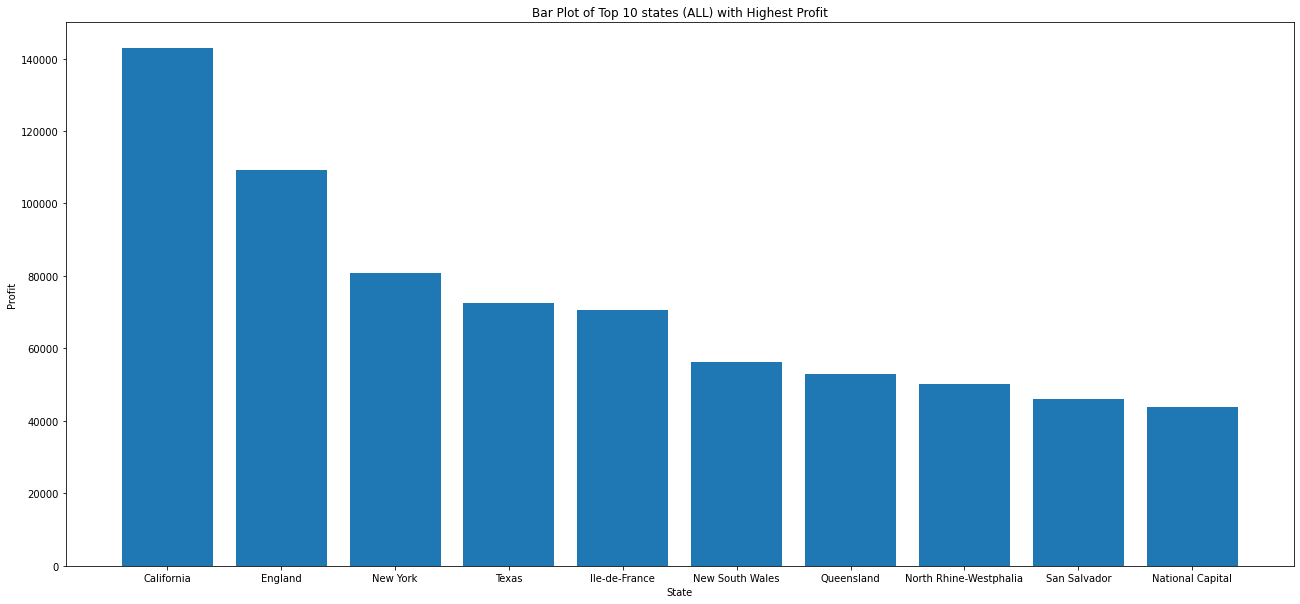

In [ ]:
profit_by_state = df.groupby("State")["Profit"].sum().reset_index()
top_10_states = profit_by_state.sort_values("Profit", ascending=False).head(10)
fig = plt.figure(figsize=(22,10))
plt.bar(top_10_states["State"], top_10_states["Profit"])
plt.title("Bar Plot of Top 10 states (ALL) with Highest Profit")
plt.ylabel("Profit")
plt.xlabel("State")
plt.show()

Expansion into United States
- Since the United States is significantly more profitable than the other countries, we would like to see which states within the US are the most profitable

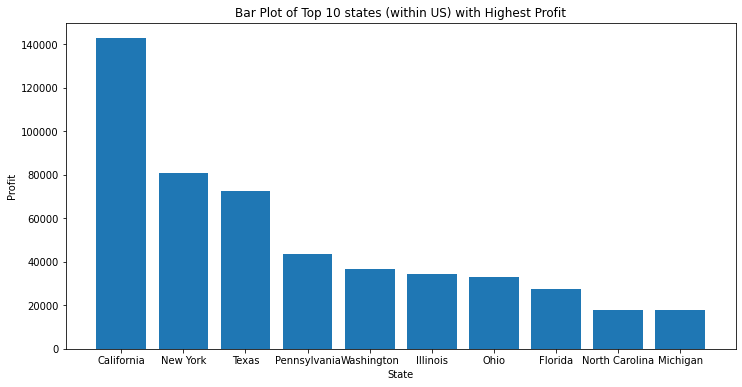

In [ ]:
us_df = df[df["Country"] == "United States"]
profit_by_state = us_df.groupby("State")["Profit"].sum().reset_index()
top_10_states = profit_by_state.sort_values("Profit", ascending=False).head(10)
fig = plt.figure(figsize=(12,6))
plt.bar(top_10_states["State"], top_10_states["Profit"])
plt.title("Bar Plot of Top 10 states (within US) with Highest Profit")
plt.ylabel("Profit")
plt.xlabel("State")
plt.show()

Using city as observation for profit

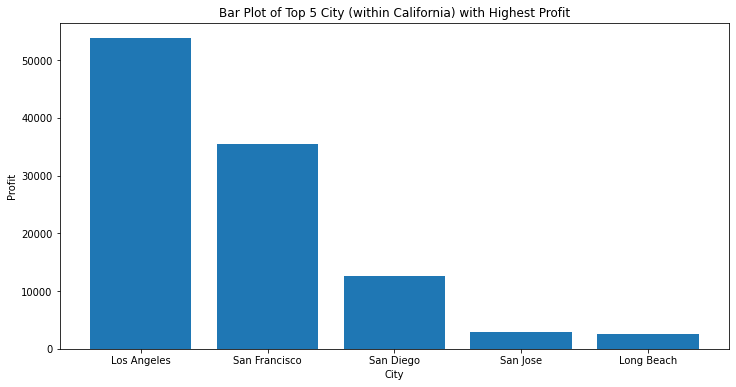

In [ ]:
cali_df = df[df["State"] == "California"]
profit_by_city = cali_df.groupby("City")["Profit"].sum().reset_index()
top_10_states = profit_by_city.sort_values("Profit", ascending=False).head(5)
fig = plt.figure(figsize=(12,6))
plt.bar(top_10_states["City"], top_10_states["Profit"])
plt.title("Bar Plot of Top 5 City (within California) with Highest Profit")
plt.ylabel("Profit")
plt.xlabel("City")
plt.show()

ALL cities

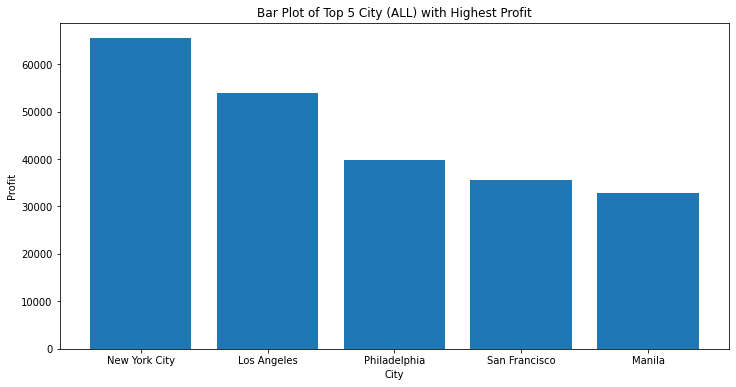

In [ ]:
profit_by_city = df.groupby("City")["Profit"].sum().reset_index()
top_10_states = profit_by_city.sort_values("Profit", ascending=False).head(5)
fig = plt.figure(figsize=(12,6))
plt.bar(top_10_states["City"], top_10_states["Profit"])
plt.title("Bar Plot of Top 5 City (ALL) with Highest Profit")
plt.ylabel("Profit")
plt.xlabel("City")
plt.show()

Trend of profitability over a year
- We will be using the Order Date field as the base attribute to determine the month

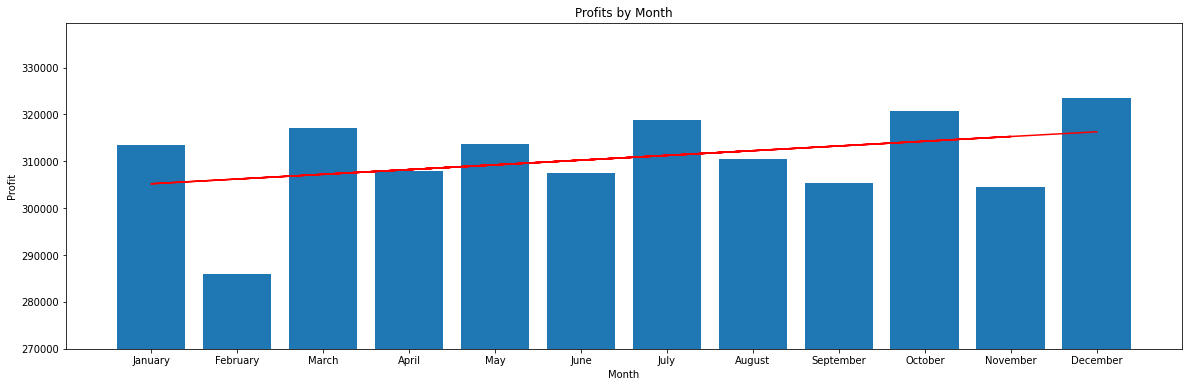

In [ ]:
df["Month"] = df["Order Date"].dt.month
profit_by_month = df.groupby("Month")["Profit"].sum().reset_index()
profit_by_month = profit_by_month.sort_values("Profit", ascending=False)

x = profit_by_month["Month"]
y = profit_by_month["Profit"]
slope, intercept = np.polyfit(x, y, 1)

fig = plt.figure(figsize=(20,6))

month_names = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
plt.xticks(profit_by_month["Month"].sort_values(), month_names)

plt.bar(x, y)
plt.xlabel("Month")
plt.ylabel("Profit")
plt.title("Profits by Month")

plt.ylim(bottom=270000)
plt.plot(x, slope*x + intercept, color="red")

plt.show()


Finding the raw count of orders per month

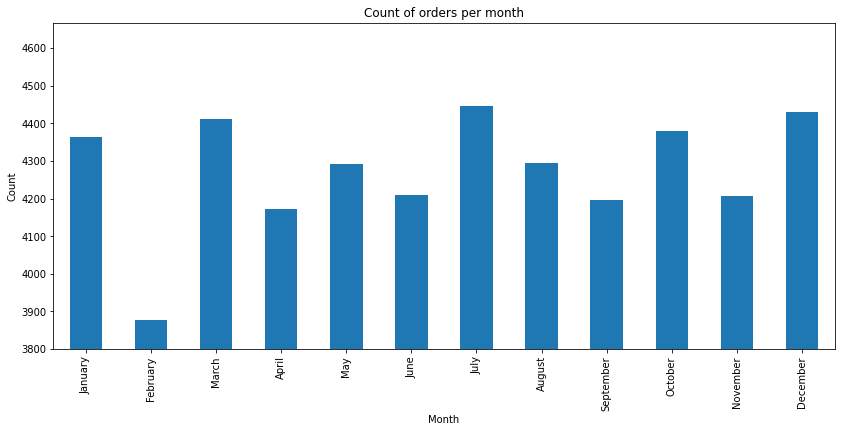

In [ ]:
month_dict = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
df["Month"] = df["Order Date"].dt.month
top_10_month_count = df["Month"].value_counts().sort_index()
top_10_month_count_in_order = top_10_month_count.rename(index=month_dict)
top_10_month_count_in_order.plot(kind='bar', figsize=(14,6))
plt.title("Count of orders per month")
plt.xlabel("Month")
plt.ylabel("Count")

plt.ylim(3800)

plt.show()

### Profitability of Top 10 Products

In [1]:
profit_by_product = df.groupby("Product")["Profit"].sum().reset_index()
top_10_product = profit_by_product.sort_values("Profit", ascending=False).head(10)
fig = plt.figure(figsize=(22,10))
plt.bar(top_10_product["Product"], top_10_product["Profit"])

plt.title("Bar Plot of Top 10 Products with Highest Profit")
plt.ylabel("Profit")
plt.xlabel("Products")
plt.grid()
plt.show()

NameError: ignored

In [ ]:
profit_by_segment = df.groupby("Segment")["Profit"].sum().reset_index()
top_segments = profit_by_segment.sort_values("Profit", ascending=False).head(10)
fig = plt.figure(figsize=(22,10))
plt.bar(top_segments["Segment"], top_segments["Profit"])

plt.title("Bar Plot of Profit by Segments")
plt.ylabel("Profit")
plt.xlabel("Segments")
plt.grid()
plt.show()